Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
import statistics
import copy
import math
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Defining Datasets

Financial Dataset

In [2]:
# Profit Per Patient
financePatient = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\hospitalpatientprofit.xlsx")

# General Finance Datasets
financeData2020 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-20.xlsx")
financeData2019 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-19 (1).xlsx")
financeData2018 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-18.xlsx")
financeData2017 = pd.read_excel(r"C:\Users\thewa\Downloads\hadr-17.xlsx")
financeData2016 = pd.read_excel(r"C:\Users\thewa\Downloads\hadf16-_092018.xlsx")
financeData2015 = pd.read_excel(r"C:\Users\thewa\Downloads\hafd15-32018-extract.xlsx")
financeData2014 = pd.read_excel(r"C:\Users\thewa\Downloads\hafd14-42017-extract.xlsx")
financeData2013 = pd.read_excel(r"C:\Users\thewa\Downloads\hafd13-92015-extract.xls")
financeData2012 = pd.read_excel(r"C:\Users\thewa\Downloads\hafd12-10-2014-extract.xls")

financeData2020 = financeData2020.loc[(financeData2020["DAY_PER"] == 366) & (financeData2020["TYPE_HOSP"] != "Kaiser") & (financeData2020["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)
financeData2019 = financeData2019.loc[(financeData2019["DAY_PER"] == 365) & (financeData2019["TYPE_HOSP"] != "Kaiser") & (financeData2019["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)
financeData2018 = financeData2018.loc[(financeData2018["DAY_PER"] == 365) & (financeData2018["TYPE_HOSP"] != "Kaiser") & (financeData2018["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)
financeData2017 = financeData2017.loc[(financeData2017["DAY_PER"] == 365) & (financeData2017["TYPE_HOSP"] != "Kaiser") & (financeData2017["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)
financeData2016 = financeData2016.loc[(financeData2016["DAY_PER"] == 366) & (financeData2016["TYPE_HOSP"] != "Kaiser") & (financeData2016["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)
financeData2015 = financeData2015.loc[(financeData2015["DAY_PER"] == 365) & (financeData2015["TYPE_HOSP"] != "Kaiser") & (financeData2015["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)
financeData2014 = financeData2014.loc[(financeData2014["DAY_PER"] == 365) & (financeData2014["TYPE_HOSP"] != "Kaiser") & (financeData2014["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)
financeData2013 = financeData2013.loc[(financeData2013["DAY_PER"] == 365) & (financeData2013["TYPE_HOSP"] != "Kaiser") & (financeData2013["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)
financeData2012 = financeData2012.loc[(financeData2012["DAY_PER"] == 366) & (financeData2012["TYPE_HOSP"] != "Kaiser") & (financeData2012["ALOS_ALL"] != 0)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False).reset_index(drop = True)

# Profit By Hospital
profits2020 = financeData2020[["FAC_NO", "NET_INCOME"]]
profits2019 = financeData2019[["FAC_NO", "NET_INCOME"]]
profits2018 = financeData2018[["FAC_NO", "NET_INCOME"]]
profits2017 = financeData2017[["FAC_NO", "NET_INCOME"]]
profits2016 = financeData2016[["FAC_NO", "NET_INCOME"]]
profits2015 = financeData2015[["FAC_NO", "NET_INCOME"]]
profits2014 = financeData2014[["FAC_NO", "NET_INCOME"]]
profits2013 = financeData2013[["FAC_NO", "NET_INCOME"]]
profits2012 = financeData2012[["FAC_NO", "NET_INCOME"]]

# Inpatient Gross Revenue Per Patient
iptgr2020 = financeData2020[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]
iptgr2019 = financeData2019[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]
iptgr2018 = financeData2018[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]
iptgr2017 = financeData2017[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]
iptgr2016 = financeData2016[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]
iptgr2015 = financeData2015[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]
iptgr2014 = financeData2014[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]
iptgr2013 = financeData2013[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]
iptgr2012 = financeData2012[["FAC_NO", "DIS_TOT", 'GR_IP_TOT']]

# Outpatient Gross Revenue Per Patient
optgr2020 = financeData2020[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]
optgr2019 = financeData2019[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]
optgr2018 = financeData2018[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]
optgr2017 = financeData2017[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]
optgr2016 = financeData2016[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]
optgr2015 = financeData2015[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]
optgr2014 = financeData2014[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]
optgr2013 = financeData2013[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]
optgr2012 = financeData2012[["FAC_NO", "VIS_TOT", 'GR_OP_TOT']]

# Final Model for Finance
fcommonHospitals = list(set(financeData2018["FAC_NO"].tolist()) & set(financeData2017["FAC_NO"].tolist()))

fmodel2018 = financeData2018.loc[financeData2018["FAC_NO"].isin(fcommonHospitals)][["FAC_NO", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES", "DED_FR_REV"]]
fmodel2017 = financeData2017.loc[financeData2017["FAC_NO"].isin(fcommonHospitals)][["FAC_NO", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES", "DED_FR_REV"]]

# Sensitivity Checking Datasets
s1commonHospitals = list(set(financeData2020["FAC_NO"].tolist()) & set(financeData2019["FAC_NO"].tolist()))
s1model2020 = financeData2020.loc[financeData2020["FAC_NO"].isin(s1commonHospitals)][["FAC_NO", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES"]]
s1model2019 = financeData2019.loc[financeData2019["FAC_NO"].isin(s1commonHospitals)][["FAC_NO", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES"]]

s2commonHospitals = list(set(financeData2019["FAC_NO"].tolist()) & set(financeData2018["FAC_NO"].tolist()))
s2model2019 = financeData2019.loc[financeData2019["FAC_NO"].isin(s2commonHospitals)][["FAC_NO", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES"]]
s2model2018 = financeData2018.loc[financeData2018["FAC_NO"].isin(s2commonHospitals)][["FAC_NO", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES"]]

ecommonHospitals = list(set(financeData2018["FAC_NO"].tolist()) & set(financeData2017["FAC_NO"].tolist()))

emodel2018 = financeData2018.loc[financeData2018["FAC_NO"].isin(ecommonHospitals)][["FAC_NO", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES", "DED_FR_REV"]]
emodel2017 = financeData2017.loc[financeData2017["FAC_NO"].isin(ecommonHospitals)][["FAC_NO", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES", "DED_FR_REV"]]

fivemodel2020 = financeData2020[["FAC_NAME", "NET_INCOME", "TOT_ASST", "MED_STAFF", "EXP_ED", "EXP_RES", "VIS_TOT", "DIS_TOT"]]

Quality Dataset

In [3]:
# Quality of Care Dataset
qualityData = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\data.xlsx")

qualityCommonHospitals = set(qualityData[qualityData["YEAR"] == 2019]["OSHPDID"].tolist()) & set(qualityData[qualityData["YEAR"] == 2018]["OSHPDID"].tolist()) & set(qualityData[qualityData["YEAR"] == 2017]["OSHPDID"].tolist()) & set(qualityData[qualityData["YEAR"] == 2016]["OSHPDID"].tolist())

qualityData2019 = qualityData[(qualityData["YEAR"] == 2019) & (qualityData["OSHPDID"].isin(qualityCommonHospitals)) & (qualityData["Procedure/Condition"].isin(["AMI", "Acute Stroke", "Carotid Endarterectomy", "GI Hemorrhage", "Heart Failure", "Hip Fracture", "PCI", "Pneumonia"]))]
qualityData2018 = qualityData[(qualityData["YEAR"] == 2018) & (qualityData["OSHPDID"].isin(qualityCommonHospitals)) & (qualityData["Procedure/Condition"].isin(["AMI", "Acute Stroke", "Carotid Endarterectomy", "GI Hemorrhage", "Heart Failure", "Hip Fracture", "PCI", "Pneumonia"]))]
qualityData2017 = qualityData[(qualityData["YEAR"] == 2017) & (qualityData["OSHPDID"].isin(qualityCommonHospitals)) & (qualityData["Procedure/Condition"].isin(["AMI", "Acute Stroke", "Carotid Endarterectomy", "GI Hemorrhage", "Heart Failure", "Hip Fracture", "PCI", "Pneumonia"]))]
qualityData2016 = qualityData[(qualityData["YEAR"] == 2016) & (qualityData["OSHPDID"].isin(qualityCommonHospitals)) & (qualityData["Procedure/Condition"].isin(["AMI", "Acute Stroke", "Carotid Endarterectomy", "GI Hemorrhage", "Heart Failure", "Hip Fracture", "PCI", "Pneumonia"]))]

# Regression? All placeholders
qregressCommonHospitals = []
qrfinanceData2018 = []

Finding the Patient to Profit Ratio

Initializing Variables

In [4]:
# Initializing Variables
hospitalsInCommon = []
predictionList = []

patient2020 = []
patient2019 = []
patient2018 = []
patient2017 = []
patient2016 = []
patient2015 = []
patient2014 = []
patient2013 = []

pr2020 = []
pr2019 = []
pr2018 = []
pr2017 = []
pr2016 = []
pr2015 = []
pr2014 = []
pr2013 = []

profit2020 = []
profit2019 = []
profit2018 = []
profit2017 = []
profit2016 = []
profit2015 = []
profit2014 = []
profit2013 = []

Code

In [5]:
financePatient = financePatient.dropna()

# Names of the Hospitals in any given year
financePatient2020 = financePatient.loc[(financePatient["Profit2020"] < 300000000) & (financePatient["Profit2020"] > -200000000)]["Hospital2020"].tolist()
financePatient2019 = financePatient.loc[(financePatient["Profit2019"] < 300000000) & (financePatient["Profit2019"] > -200000000)]["Hospital2019"].tolist()
financePatient2018 = financePatient.loc[(financePatient["Profit2018"] < 300000000) & (financePatient["Profit2018"] > -200000000)]["Hospital2018"].tolist()
financePatient2017 = financePatient.loc[(financePatient["Profit2017"] < 300000000) & (financePatient["Profit2017"] > -200000000)]["Hospital2017"].tolist()
financePatient2016 = financePatient.loc[(financePatient["Profit2016"] < 300000000) & (financePatient["Profit2016"] > -200000000)]["Hospital2016"].tolist()
financePatient2015 = financePatient.loc[(financePatient["Profit2015"] < 300000000) & (financePatient["Profit2015"] > -200000000)]["Hospital2015"].tolist()
financePatient2014 = financePatient.loc[(financePatient["Profit2014"] < 300000000) & (financePatient["Profit2014"] > -200000000)]["Hospital2014"].tolist()
financePatient2013 = financePatient.loc[(financePatient["Profit2013"] < 300000000) & (financePatient["Profit2013"] > -200000000)]["Hospital2013"].tolist()

# Taking the union of all the sets (finding all hospitals in common)
hospitalsInCommon = list(set(financePatient2020) & set(financePatient2019) & set(financePatient2018) & set(financePatient2017) & set(financePatient2016) & set(financePatient2015) & set(financePatient2014) & set(financePatient2013))

# Fetching the Number of Patients, Net Patient Revenue, and Profit
for hospital in hospitalsInCommon:
    # Number of Patients
    patient2020.append(financePatient.loc[financePatient["Hospital2020"] == hospital].iloc[0,1])
    patient2019.append(financePatient.loc[financePatient["Hospital2019"] == hospital].iloc[0,1])
    patient2018.append(financePatient.loc[financePatient["Hospital2018"] == hospital].iloc[0,1])
    patient2017.append(financePatient.loc[financePatient["Hospital2017"] == hospital].iloc[0,1])
    patient2016.append(financePatient.loc[financePatient["Hospital2016"] == hospital].iloc[0,1])
    patient2015.append(financePatient.loc[financePatient["Hospital2015"] == hospital].iloc[0,1])
    patient2014.append(financePatient.loc[financePatient["Hospital2014"] == hospital].iloc[0,1])
    patient2013.append(financePatient.loc[financePatient["Hospital2013"] == hospital].iloc[0,1])

    # Net Patient Revenue
    pr2020.append(financePatient.loc[financePatient["Hospital2020"] == hospital].iloc[0,2])
    pr2019.append(financePatient.loc[financePatient["Hospital2019"] == hospital].iloc[0,2])
    pr2018.append(financePatient.loc[financePatient["Hospital2018"] == hospital].iloc[0,2])
    pr2017.append(financePatient.loc[financePatient["Hospital2017"] == hospital].iloc[0,2])
    pr2016.append(financePatient.loc[financePatient["Hospital2016"] == hospital].iloc[0,2])
    pr2015.append(financePatient.loc[financePatient["Hospital2015"] == hospital].iloc[0,2])
    pr2014.append(financePatient.loc[financePatient["Hospital2014"] == hospital].iloc[0,2])
    pr2013.append(financePatient.loc[financePatient["Hospital2013"] == hospital].iloc[0,2])

    # Profit
    profit2020.append(financePatient.loc[financePatient["Hospital2020"] == hospital].iloc[0,3])
    profit2019.append(financePatient.loc[financePatient["Hospital2019"] == hospital].iloc[0,3])
    profit2018.append(financePatient.loc[financePatient["Hospital2018"] == hospital].iloc[0,3])
    profit2017.append(financePatient.loc[financePatient["Hospital2017"] == hospital].iloc[0,3])
    profit2016.append(financePatient.loc[financePatient["Hospital2016"] == hospital].iloc[0,3])
    profit2015.append(financePatient.loc[financePatient["Hospital2015"] == hospital].iloc[0,3])
    profit2014.append(financePatient.loc[financePatient["Hospital2014"] == hospital].iloc[0,3])
    profit2013.append(financePatient.loc[financePatient["Hospital2013"] == hospital].iloc[0,3])

# Creating the Plots
fig = make_subplots(rows=4, cols=2, subplot_titles = ("2020", "2019", "2018", "2017", "2016", "2015", "2014", "2013"))

# Plotting 2020 Patient over Profit
x2020 = np.array(patient2020)
x2019 = np.array(patient2019)
x2018 = np.array(patient2018)
x2017 = np.array(patient2017)
x2016 = np.array(patient2016)
x2015 = np.array(patient2015)
x2014 = np.array(patient2014)
x2013 = np.array(patient2013)

y2020 = np.array(profit2020)
y2019 = np.array(profit2019)
y2018 = np.array(profit2018)
y2017 = np.array(profit2017)
y2016 = np.array(profit2016)
y2015 = np.array(profit2015)
y2014 = np.array(profit2014)
y2013 = np.array(profit2013)

m2020, b2020 = np.polyfit(x2020,y2020,1)
m2019, b2019 = np.polyfit(x2019,y2019,1)
m2018, b2018 = np.polyfit(x2018,y2018,1)
m2017, b2017 = np.polyfit(x2017,y2017,1)
m2016, b2016 = np.polyfit(x2016,y2016,1)
m2015, b2015 = np.polyfit(x2015,y2015,1)
m2014, b2014 = np.polyfit(x2014,y2014,1)
m2013, b2013 = np.polyfit(x2013,y2013,1)

predictionList.append([m2020,b2020])
predictionList.append([m2019,b2019])
predictionList.append([m2018,b2018])
predictionList.append([m2017,b2017])
predictionList.append([m2016,b2016])
predictionList.append([m2015,b2015])
predictionList.append([m2014,b2014])
predictionList.append([m2013,b2013])

# Drawing Line of Best Fit

ppr2020 = go.Scatter(x = patient2020, y = profit2020, mode = "markers", marker = dict(color = "red"), legendgroup = "1", name = "Actual")
ppr2019 = go.Scatter(x = patient2019, y = profit2019, mode = "markers", marker = dict(color = "red"), showlegend = False)
ppr2018 = go.Scatter(x = patient2018, y = profit2018, mode = "markers", marker = dict(color = "red"), legendgroup = "3", name = "Actual")
ppr2017 = go.Scatter(x = patient2017, y = profit2017, mode = "markers", marker = dict(color = "red"), showlegend = False)
ppr2016 = go.Scatter(x = patient2016, y = profit2016, mode = "markers", marker = dict(color = "red"), legendgroup = "5", name = "Actual")
ppr2015 = go.Scatter(x = patient2015, y = profit2015, mode = "markers", marker = dict(color = "red"), showlegend = False)
ppr2014 = go.Scatter(x = patient2014, y = profit2014, mode = "markers", marker = dict(color = "red"), legendgroup = "7", name = "Actual")
ppr2013 = go.Scatter(x = patient2013, y = profit2013, mode = "markers", marker = dict(color = "red"), showlegend = False)

pprline2020 = go.Scatter(x=x2020, y=m2020*x2020+b2020, mode="lines", line = dict(color = "blue"), legendgroup = "1", name = "Line of Best Fit")
pprline2019 = go.Scatter(x=x2019, y=m2019*x2019+b2019, mode="lines", line = dict(color = "blue"), showlegend = False)
pprline2018 = go.Scatter(x=x2018, y=m2018*x2018+b2018, mode="lines", line = dict(color = "blue"), legendgroup = "3", name = "Line of Best Fit")
pprline2017 = go.Scatter(x=x2017, y=m2017*x2017+b2017, mode="lines", line = dict(color = "blue"), showlegend = False)
pprline2016 = go.Scatter(x=x2016, y=m2016*x2016+b2016, mode="lines", line = dict(color = "blue"), legendgroup = "5", name = "Line of Best Fit")
pprline2015 = go.Scatter(x=x2015, y=m2015*x2015+b2015, mode="lines", line = dict(color = "blue"), showlegend = False)
pprline2014 = go.Scatter(x=x2014, y=m2014*x2014+b2014, mode="lines", line = dict(color = "blue"), legendgroup = "7", name = "Line of Best Fit")
pprline2013 = go.Scatter(x=x2013, y=m2013*x2013+b2013, mode="lines", line = dict(color = "blue"), showlegend = False)

fig.append_trace(ppr2020, row=1, col=1)
fig.append_trace(ppr2019, row=1, col=2)
fig.append_trace(ppr2018, row=2, col=1)
fig.append_trace(ppr2017, row=2, col=2)
fig.append_trace(ppr2016, row=3, col=1)
fig.append_trace(ppr2015, row=3, col=2)
fig.append_trace(ppr2014, row=4, col=1)
fig.append_trace(ppr2013, row=4, col=2)

fig.append_trace(pprline2020, row=1, col=1)
fig.append_trace(pprline2019, row=1, col=2)
fig.append_trace(pprline2018, row=2, col=1)
fig.append_trace(pprline2017, row=2, col=2)
fig.append_trace(pprline2016, row=3, col=1)
fig.append_trace(pprline2015, row=3, col=2)
fig.append_trace(pprline2014, row=4, col=1)
fig.append_trace(pprline2013, row=4, col=2)

fig.update_layout(title = "Plotting the Patient and Net Profit Relationship", width = 1600, height = 800, xaxis1_title = "Number of Patients", yaxis1_title = "Profit", xaxis2_title = "Number of Patients", yaxis2_title = "Profit", xaxis3_title = "Number of Patients", yaxis3_title = "Profit", xaxis4_title = "Number of Patients", yaxis4_title = "Profit", xaxis5_title = "Number of Patients", yaxis5_title = "Profit", xaxis6_title = "Number of Patients", yaxis6_title = "Profit", xaxis7_title = "Number of Patients", yaxis7_title = "Profit", xaxis8_title = "Number of Patients", yaxis8_title = "Profit", legend_tracegroupgap = 136)
fig.update_yaxes(tickvals=[-100000000, 0, 100000000, 200000000, 3000000000], range = [-100000000, 350000000])

fig.show()

# Displaying the line of best fit equations
for val in predictionList:
    if val[1] < 0:
        print(str(val[0])+"x - " + str(-val[1]))
    else:
        print(str(val[0])+"x + " + str(val[1]))


2351.2533862145874x + 3298730.6739574266
2279.5770499365303x - 788458.5072411546
3608.031456754057x - 3158551.361632787
2551.40980209533x - 583383.3322492241
4587.041812558962x - 10723891.13427876
4346.003494550344x - 10275580.058140157
3589.658895215853x - 5264323.052172993
2231.064419958868x + 993568.1718050175


Modeling the Gross Revenue Per Patient

Modeling Inpatient Revenue Per Patient

Initializing Variables

In [6]:
iplinearregressdata = []

iptnet2020 = []
iptnet2019 = []
iptnet2018 = []
iptnet2017 = []
iptnet2016 = []
iptnet2015 = []
iptnet2014 = []
iptnet2013 = []
iptnet2012 = []

Data Collection

In [7]:
# If it exists, put it in
for index, row in iptgr2020.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2020.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

for index, row in iptgr2019.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2019.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

for index, row in iptgr2018.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2018.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))

for index, row in iptgr2017.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2017.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))
        
for index, row in iptgr2016.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2016.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))
        
for index, row in iptgr2015.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2015.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))
        
for index, row in iptgr2014.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2014.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))
        
for index, row in iptgr2013.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2013.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))
        
for index, row in iptgr2012.iterrows():
    if row['DIS_TOT'] != 0:
        iptnet2012.append(int(row['GR_IP_TOT'] / row['DIS_TOT']))


Outlier Elimination

In [8]:
iptnet2020 = np.array(iptnet2020)
iptnet2020 = iptnet2020[abs(iptnet2020-np.mean(iptnet2020)) < 3 * np.std(iptnet2020)]
iptnum2020 = [x for x in range(len(iptnet2020))]

iptnet2019 = np.array(iptnet2019)
iptnet2019 = iptnet2019[abs(iptnet2019-np.mean(iptnet2019)) < 3 * np.std(iptnet2019)]
iptnum2019 = [x for x in range(len(iptnet2019))]

iptnet2018 = np.array(iptnet2018)
iptnet2018 = iptnet2018[abs(iptnet2018-np.mean(iptnet2018)) < 3 * np.std(iptnet2018)]
iptnum2018 = [x for x in range(len(iptnet2018))]

iptnet2017 = np.array(iptnet2017)
iptnet2017 = iptnet2017[abs(iptnet2017-np.mean(iptnet2017)) < 3 * np.std(iptnet2017)]
iptnum2017 = [x for x in range(len(iptnet2017))]

iptnet2016 = np.array(iptnet2016)
iptnet2016 = iptnet2016[abs(iptnet2016-np.mean(iptnet2016)) < 3 * np.std(iptnet2016)]
iptnum2016 = [x for x in range(len(iptnet2016))]

iptnet2015 = np.array(iptnet2015)
iptnet2015 = iptnet2015[abs(iptnet2015-np.mean(iptnet2015)) < 3 * np.std(iptnet2015)]
iptnum2015 = [x for x in range(len(iptnet2015))]

iptnet2014 = np.array(iptnet2014)
iptnet2014 = iptnet2014[abs(iptnet2014-np.mean(iptnet2014)) < 3 * np.std(iptnet2014)]
iptnum2014 = [x for x in range(len(iptnet2014))]

iptnet2013 = np.array(iptnet2013)
iptnet2013 = iptnet2013[abs(iptnet2013-np.mean(iptnet2013)) < 3 * np.std(iptnet2013)]
iptnum2013 = [x for x in range(len(iptnet2013))]

iptnet2012 = np.array(iptnet2012)
iptnet2012 = iptnet2012[abs(iptnet2012-np.mean(iptnet2012)) < 3 * np.std(iptnet2012)]
iptnum2012 = [x for x in range(len(iptnet2012))]

Graphing Inpatient Value over Time

In [9]:
fig = make_subplots(rows=3, cols=3, subplot_titles = ("2020", "2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012"))

iplinearregressdata.append(statistics.median(iptnet2020))
iplinearregressdata.append(statistics.median(iptnet2019))
iplinearregressdata.append(statistics.median(iptnet2018))
iplinearregressdata.append(statistics.median(iptnet2017))
iplinearregressdata.append(statistics.median(iptnet2016))
iplinearregressdata.append(statistics.median(iptnet2015))
iplinearregressdata.append(statistics.median(iptnet2014))
iplinearregressdata.append(statistics.median(iptnet2013))
iplinearregressdata.append(statistics.median(iptnet2012))

iptscatter2020 = go.Scatter(x = iptnum2020, y = iptnet2020, mode = "markers", marker = dict(color = "red"), legendgroup = "1", name = "Cost for Treatment")
iptscatter2019 = go.Scatter(x = iptnum2019, y = iptnet2019, mode = "markers", marker = dict(color = "red"), showlegend = False)
iptscatter2018 = go.Scatter(x = iptnum2018, y = iptnet2018, mode = "markers", marker = dict(color = "red"), showlegend = False)
iptscatter2017 = go.Scatter(x = iptnum2017, y = iptnet2017, mode = "markers", marker = dict(color = "red"), legendgroup = "4", name = "Cost for Treatment")
iptscatter2016 = go.Scatter(x = iptnum2016, y = iptnet2016, mode = "markers", marker = dict(color = "red"), showlegend = False)
iptscatter2015 = go.Scatter(x = iptnum2015, y = iptnet2015, mode = "markers", marker = dict(color = "red"), showlegend = False)
iptscatter2014 = go.Scatter(x = iptnum2014, y = iptnet2014, mode = "markers", marker = dict(color = "red"), legendgroup = "7", name = "Cost for Treatment")
iptscatter2013 = go.Scatter(x = iptnum2013, y = iptnet2013, mode = "markers", marker = dict(color = "red"), showlegend = False)
iptscatter2012 = go.Scatter(x = iptnum2012, y = iptnet2012, mode = "markers", marker = dict(color = "red"), showlegend = False)

fig.append_trace(iptscatter2020, row=1, col=1)
fig.append_trace(iptscatter2019, row=1, col=2)
fig.append_trace(iptscatter2018, row=1, col=3)
fig.append_trace(iptscatter2017, row=2, col=1)
fig.append_trace(iptscatter2016, row=2, col=2)
fig.append_trace(iptscatter2015, row=2, col=3)
fig.append_trace(iptscatter2014, row=3, col=1)
fig.append_trace(iptscatter2013, row=3, col=2)
fig.append_trace(iptscatter2012, row=3, col=3)

fig.add_hline(y=statistics.median(iptnet2020), line_dash="dot", row=1, col=1, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(iptnet2019), line_dash="dot", row=1, col=2, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(iptnet2018), line_dash="dot", row=1, col=3, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(iptnet2017), line_dash="dot", row=2, col=1, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(iptnet2016), line_dash="dot", row=2, col=2, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(iptnet2015), line_dash="dot", row=2, col=3, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(iptnet2014), line_dash="dot", row=3, col=1, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(iptnet2013), line_dash="dot", row=3, col=2, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(iptnet2012), line_dash="dot", row=3, col=3, line_color="#0000FF", line_width=2)

fig.update_layout(title = "Plotting the Inpatient Revenue Per Patient", width = 2400, height = 600, yaxis1_title = "Price", yaxis2_title = "Price", yaxis3_title = "Price", yaxis4_title = "Price", yaxis5_title = "Price", yaxis6_title = "Price", yaxis7_title = "Price", yaxis8_title = "Price", yaxis9_title = "Price", legend_tracegroupgap = 144)
fig.update_yaxes(tickvals=[0, 400000, 800000], range = [-100000, 900000])
fig.update_xaxes(showticklabels=False)

fig.show()


Creating Line of Best Fit for Inpatient Revenue Per Patient

In [10]:
iplinearregressdata.reverse()
x = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
mavg, bavg = np.polyfit(x,iplinearregressdata,1)

fig = make_subplots(specs=[[{"secondary_y": True}]])

iptlbf = go.Scatter(x = x, y = mavg*x+bavg, name = "Line of Best Fit")
iptavg = go.Scatter(y = iplinearregressdata, x = x, mode = "markers", marker = dict(color = "red"), name = "Actual")

fig.add_trace(iptlbf)
fig.add_trace(iptavg)

fig.update_layout(title = "Median Inpatient Cost Per Patient Per Year", yaxis1_title = "Cost", xaxis1_title = "Years")

fig.show()

Modeling Outpatient Revenue Per Patient

Initializing Variables

In [11]:
oplinearregressdata = []

optnet2020 = []
optnet2019 = []
optnet2018 = []
optnet2017 = []
optnet2016 = []
optnet2015 = []
optnet2014 = []
optnet2013 = []
optnet2012 = []

Data Collection

In [12]:
# If it exists, put it in
for index, row in optgr2020.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2020.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

for index, row in optgr2019.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2019.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

for index, row in optgr2018.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2018.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))

for index, row in optgr2017.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2017.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))
        
for index, row in optgr2016.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2016.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))
        
for index, row in optgr2015.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2015.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))
        
for index, row in optgr2014.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2014.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))
        
for index, row in optgr2013.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2013.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))
        
for index, row in optgr2012.iterrows():
    if row['VIS_TOT'] != 0:
        optnet2012.append(int(row['GR_OP_TOT'] / row['VIS_TOT']))


Outlier Elimination

In [13]:
optnet2020 = np.array(optnet2020)
optnet2020 = optnet2020[abs(optnet2020-np.mean(optnet2020)) < 3 * np.std(optnet2020)]
optnum2020 = [x for x in range(len(optnet2020))]

optnet2019 = np.array(optnet2019)
optnet2019 = optnet2019[abs(optnet2019-np.mean(optnet2019)) < 3 * np.std(optnet2019)]
optnum2019 = [x for x in range(len(optnet2019))]

optnet2018 = np.array(optnet2018)
optnet2018 = optnet2018[abs(optnet2018-np.mean(optnet2018)) < 3 * np.std(optnet2018)]
optnum2018 = [x for x in range(len(optnet2018))]

optnet2017 = np.array(optnet2017)
optnet2017 = optnet2017[abs(optnet2017-np.mean(optnet2017)) < 3 * np.std(optnet2017)]
optnum2017 = [x for x in range(len(optnet2017))]

optnet2016 = np.array(optnet2016)
optnet2016 = optnet2016[abs(optnet2016-np.mean(optnet2016)) < 3 * np.std(optnet2016)]
optnum2016 = [x for x in range(len(optnet2016))]

optnet2015 = np.array(optnet2015)
optnet2015 = optnet2015[abs(optnet2015-np.mean(optnet2015)) < 3 * np.std(optnet2015)]
optnum2015 = [x for x in range(len(optnet2015))]

optnet2014 = np.array(optnet2014)
optnet2014 = optnet2014[abs(optnet2014-np.mean(optnet2014)) < 3 * np.std(optnet2014)]
optnum2014 = [x for x in range(len(optnet2014))]

optnet2013 = np.array(optnet2013)
optnet2013 = optnet2013[abs(optnet2013-np.mean(optnet2013)) < 3 * np.std(optnet2013)]
optnum2013 = [x for x in range(len(optnet2013))]

optnet2012 = np.array(optnet2012)
optnet2012 = optnet2012[abs(optnet2012-np.mean(optnet2012)) < 3 * np.std(optnet2012)]
optnum2012 = [x for x in range(len(optnet2012))]

Graphing Outpatient Value over Time

In [14]:
fig = make_subplots(rows=3, cols=3, subplot_titles = ("2020", "2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012"))

oplinearregressdata.append(statistics.median(optnet2020))
oplinearregressdata.append(statistics.median(optnet2019))
oplinearregressdata.append(statistics.median(optnet2018))
oplinearregressdata.append(statistics.median(optnet2017))
oplinearregressdata.append(statistics.median(optnet2016))
oplinearregressdata.append(statistics.median(optnet2015))
oplinearregressdata.append(statistics.median(optnet2014))
oplinearregressdata.append(statistics.median(optnet2013))
oplinearregressdata.append(statistics.median(optnet2012))

optscatter2020 = go.Scatter(x = optnum2020, y = optnet2020, mode = "markers", marker = dict(color = "red"), legendgroup = "1", name = "Cost for Treatment")
optscatter2019 = go.Scatter(x = optnum2019, y = optnet2019, mode = "markers", marker = dict(color = "red"), showlegend = False)
optscatter2018 = go.Scatter(x = optnum2018, y = optnet2018, mode = "markers", marker = dict(color = "red"), showlegend = False)
optscatter2017 = go.Scatter(x = optnum2017, y = optnet2017, mode = "markers", marker = dict(color = "red"), legendgroup = "4", name = "Cost for Treatment")
optscatter2016 = go.Scatter(x = optnum2016, y = optnet2016, mode = "markers", marker = dict(color = "red"), showlegend = False)
optscatter2015 = go.Scatter(x = optnum2015, y = optnet2015, mode = "markers", marker = dict(color = "red"), showlegend = False)
optscatter2014 = go.Scatter(x = optnum2014, y = optnet2014, mode = "markers", marker = dict(color = "red"), legendgroup = "7", name = "Cost for Treatment")
optscatter2013 = go.Scatter(x = optnum2013, y = optnet2013, mode = "markers", marker = dict(color = "red"), showlegend = False)
optscatter2012 = go.Scatter(x = optnum2012, y = optnet2012, mode = "markers", marker = dict(color = "red"), showlegend = False)

fig.append_trace(optscatter2020, row=1, col=1)
fig.append_trace(optscatter2019, row=1, col=2)
fig.append_trace(optscatter2018, row=1, col=3)
fig.append_trace(optscatter2017, row=2, col=1)
fig.append_trace(optscatter2016, row=2, col=2)
fig.append_trace(optscatter2015, row=2, col=3)
fig.append_trace(optscatter2014, row=3, col=1)
fig.append_trace(optscatter2013, row=3, col=2)
fig.append_trace(optscatter2012, row=3, col=3)

fig.add_hline(y=statistics.median(optnet2020), line_dash="dot", row=1, col=1, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(optnet2019), line_dash="dot", row=1, col=2, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(optnet2018), line_dash="dot", row=1, col=3, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(optnet2017), line_dash="dot", row=2, col=1, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(optnet2016), line_dash="dot", row=2, col=2, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(optnet2015), line_dash="dot", row=2, col=3, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(optnet2014), line_dash="dot", row=3, col=1, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(optnet2013), line_dash="dot", row=3, col=2, line_color="#0000FF", line_width=2)
fig.add_hline(y=statistics.median(optnet2012), line_dash="dot", row=3, col=3, line_color="#0000FF", line_width=2)

fig.update_layout(title = "Plotting the Outpatient Revenue Per Patient", width = 2400, height = 600, yaxis1_title = "Price", yaxis2_title = "Price", yaxis3_title = "Price", yaxis4_title = "Price", yaxis5_title = "Price", yaxis6_title = "Price", yaxis7_title = "Price", yaxis8_title = "Price", yaxis9_title = "Price", legend_tracegroupgap = 144)
fig.update_yaxes(tickvals=[0, 20000, 40000], range = [-10000, 50000])
fig.update_xaxes(showticklabels=False)

fig.show()


Creating Line of Best Fit Outpatient Revenue Per Patient

In [15]:
oplinearregressdata.reverse()
x = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
mavg, bavg = np.polyfit(x,oplinearregressdata,1)

fig = make_subplots(specs=[[{"secondary_y": True}]])

optlbf = go.Scatter(x = x, y = mavg*x+bavg, name = "Line of Best Fit")
optavg = go.Scatter(y = oplinearregressdata, x = x, mode = "markers", marker = dict(color = "red"), name = "Actual")

fig.add_trace(optlbf)
fig.add_trace(optavg)

fig.update_layout(title = "Median Outpatient Cost Per Patient Per Year", yaxis1_title = "Cost", xaxis1_title = "Years")

fig.show()

Predicting Future Finance Data

In [16]:
future_net_income = []

current_net_income = []
current_total_assets = []
current_med_staff = []
current_exp_edu = []
current_exp_res = []

for index, row in fmodel2018.iterrows():
    future_net_income.append(row["NET_INCOME"])

for index, row in fmodel2017.iterrows():
    current_net_income.append(row["NET_INCOME"])
    current_total_assets.append(row["TOT_ASST"])
    current_med_staff.append(row["MED_STAFF"])
    current_exp_edu.append(row["EXP_ED"])
    current_exp_res.append(row["EXP_RES"])

Decision Tree?

In [17]:
current_conditions = [[current_net_income[x], current_total_assets[x], current_med_staff[x], current_exp_edu[x], current_exp_res[x]] for x in range(len(current_net_income))]

from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(current_conditions, future_net_income)
print(regressor)

DecisionTreeRegressor()


Regression Results

In [18]:
current_conditions = [[current_net_income[x], current_total_assets[x], current_med_staff[x], current_exp_edu[x], current_exp_res[x]] for x in range(len(current_net_income))]
clf = linear_model.LinearRegression()
clf.fit(current_conditions, future_net_income)

coefficients = list(clf.coef_)
coefficients

[0.5135057576693177,
 0.019155160982643294,
 -8121.325888709893,
 0.852042992202351,
 0.007638519784434952]

Analyzing the Regression

In [19]:
pred_net_income = []
for condition in current_conditions:
    pred_sum = 0
    for ind in range(len(coefficients)):
        pred_sum += coefficients[ind] * condition[ind]
    pred_net_income.append(pred_sum)

diff = statistics.median(future_net_income) - statistics.median(pred_net_income)
for val in range(len(pred_net_income)):
    pred_net_income[val] += diff
print(diff)

scalefactor = max(max(future_net_income), max(pred_net_income)) - min(min(future_net_income), min(pred_net_income))
# MSE
sum1 = 0
for val in range(len(pred_net_income)):
    sum1 += abs(pred_net_income[val] - future_net_income[val])**2 / scalefactor ** 2
print(sum1/len(pred_net_income))

fig = make_subplots(specs=[[{"secondary_y": True}]])

pred = go.Scatter(x = [x for x in range(len(pred_net_income))], y = pred_net_income,  mode = "markers", marker = dict(color = "red"), name = "Predicted Net Income")
fut = go.Scatter(x = [x for x in range(len(future_net_income))], y = future_net_income,  mode = "markers", marker = dict(color = "blue"), name = "Real Net Income")

fig.add_trace(pred)
fig.add_trace(fut)

fig.update_layout(title = "Predicted Net Profit versus Real Net Profit 2017-2018", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)

1326390.4435385838
0.0032661924940933272


Sensitivity Checking

In [20]:
sensfuture_net_income = []

senscurrent_net_income = []
senscurrent_total_assets = []
senscurrent_med_staff = []
senscurrent_exp_edu = []
senscurrent_exp_res = []

for index, row in s2model2019.iterrows():
    sensfuture_net_income.append(row["NET_INCOME"])

for index, row in s2model2018.iterrows():
    senscurrent_net_income.append(row["NET_INCOME"])
    senscurrent_total_assets.append(row["TOT_ASST"])
    senscurrent_med_staff.append(row["MED_STAFF"])
    senscurrent_exp_edu.append(row["EXP_ED"])
    senscurrent_exp_res.append(row["EXP_RES"])
senscurrent_conditions = [[senscurrent_net_income[x], senscurrent_total_assets[x], senscurrent_med_staff[x], senscurrent_exp_edu[x], senscurrent_exp_res[x]] for x in range(len(senscurrent_net_income))]

senspred_net_income = []
for condition in senscurrent_conditions:
    senspred_net_income.append(coefficients[0] * condition[0] + coefficients[1] * condition[1] + coefficients[2] * condition[2] + coefficients[3] * condition[3] + coefficients[4] * coefficients[4])

for val in range(len(senspred_net_income)):
    senspred_net_income[val] += diff

scalefactor = max(max(sensfuture_net_income), max(senspred_net_income)) - min(min(sensfuture_net_income), min(senspred_net_income))

sum1 = 0
for val in range(len(senspred_net_income)):
    sum1 += abs(senspred_net_income[val] - sensfuture_net_income[val]) ** 2  / scalefactor ** 2
print(sum1/len(senspred_net_income))

fig = make_subplots(specs=[[{"secondary_y": True}]])

pred = go.Scatter(x = [x for x in range(len(senspred_net_income))], y = pred_net_income,  mode = "markers", marker = dict(color = "red"), name = "Predicted Net Income")
fut = go.Scatter(x = [x for x in range(len(sensfuture_net_income))], y = future_net_income,  mode = "markers", marker = dict(color = "blue"), name = "Real Net Income")

fig.add_trace(pred)
fig.add_trace(fut)

fig.update_layout(title = "Predicted Net Profit versus Real Net Profit 2018-2019", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)

0.011465565251729384


In [21]:
sensfuture_net_income = []

senscurrent_net_income = []
senscurrent_total_assets = []
senscurrent_med_staff = []
senscurrent_exp_edu = []
senscurrent_exp_res = []

for index, row in s1model2020.iterrows():
    sensfuture_net_income.append(row["NET_INCOME"])

for index, row in s1model2019.iterrows():
    senscurrent_net_income.append(row["NET_INCOME"])
    senscurrent_total_assets.append(row["TOT_ASST"])
    senscurrent_med_staff.append(row["MED_STAFF"])
    senscurrent_exp_edu.append(row["EXP_ED"])
    senscurrent_exp_res.append(row["EXP_RES"])

senscurrent_conditions = [[senscurrent_net_income[x], senscurrent_total_assets[x], senscurrent_med_staff[x], senscurrent_exp_edu[x], senscurrent_exp_res] for x in range(len(senscurrent_net_income))]

senspred_net_income = []
for condition in senscurrent_conditions:
    senspred_net_income.append(coefficients[0] * condition[0] + coefficients[1] * condition[1] + coefficients[2] * condition[2] + coefficients[3] * condition[3] + coefficients[4] + coefficients[4])


for val in range(len(senspred_net_income)):
    senspred_net_income[val] += diff

scalefactor = max(max(sensfuture_net_income), max(senspred_net_income)) - min(min(sensfuture_net_income), min(senspred_net_income))

sum1 = 0
for val in range(len(senspred_net_income)):
    sum1 += abs(senspred_net_income[val] - sensfuture_net_income[val]) ** 2  / scalefactor ** 2
print(sum1/len(senspred_net_income))

fig = make_subplots(specs=[[{"secondary_y": True}]])

pred = go.Scatter(x = [x for x in range(len(senspred_net_income))], y = pred_net_income,  mode = "markers", marker = dict(color = "red"), name = "Predicted Net Income")
fut = go.Scatter(x = [x for x in range(len(sensfuture_net_income))], y = future_net_income,  mode = "markers", marker = dict(color = "blue"), name = "Real Net Income")

fig.add_trace(pred)
fig.add_trace(fut)

fig.update_layout(title = "Predicted Net Profit versus Real Net Profit 2019-2020", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)

0.005624308495568321


Predictions in 5 years with no staff loss

In [22]:
fivecurrent_name = []
fivecurrent_net_income = []
fivecurrent_total_assets = []
fivecurrent_med_staff = []
fivecurrent_exp_edu = []
fivecurrent_exp_res = []
fivecurrent_patients = []

for index, row in fivemodel2020.iterrows():
    fivecurrent_name.append(row["FAC_NAME"])
    fivecurrent_net_income.append(row["NET_INCOME"])
    fivecurrent_total_assets.append(row["TOT_ASST"])
    fivecurrent_med_staff.append(row["MED_STAFF"])
    fivecurrent_exp_edu.append(row["EXP_ED"])
    fivecurrent_exp_res.append(row["EXP_RES"])
    fivecurrent_patients.append(row["VIS_TOT"] + row["DIS_TOT"])

fivecurrent_conditions = [[fivecurrent_net_income[x], fivecurrent_total_assets[x], fivecurrent_med_staff[x], fivecurrent_exp_edu[x], fivecurrent_exp_res[x]] for x in range(len(fivecurrent_net_income))]
endfive_profit = []
endten_profit = []
endhundred_profit = []
closenamefive = []
closenameten = []
closenamehundred = []
specialnone = []
specialfive = []
specialfifteen = []
specialtwentyfive = []

losing5 = []
losing15 = []
losing25 = []

for condition in range(len(fivecurrent_conditions)):
    conditions = fivecurrent_conditions[condition]
    if fivecurrent_patients[condition] < 10000:
        specialnone.append(conditions[0])

    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * conditions[j]
        conditions[0] = profitsum + diff
        conditions[1] += conditions[0]
        if conditions[1] <= 0:
            closenamefive.append(fivecurrent_name[condition])
    endfive_profit.append(conditions[0])
    if fivecurrent_patients[condition] < 10000:
        specialfive.append(conditions[0])
    if conditions[0] < 0:
        losing5.append(fivecurrent_name[condition])

    for i in range(10):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * conditions[j]
        conditions[0] = profitsum + diff
        conditions[1] += conditions[0]
        if conditions[1] <= 0:
            closenameten.append(fivecurrent_name[condition])
            closenameten.extend(closenamefive)
    if fivecurrent_patients[condition] < 10000:
        specialfifteen.append(conditions[0])
    if conditions[0] < 0:
        losing15.append(fivecurrent_name[condition])
      
    endten_profit.append(conditions[0])
    for i in range(10):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * conditions[j]
        conditions[0] = profitsum + diff
        conditions[1] += conditions[0]
        if conditions[1] <= 0:
            closenamehundred.append(fivecurrent_name[condition])
            closenamehundred.extend(closenameten)
    endhundred_profit.append(conditions[0])
    if conditions[0] < 0:
        losing25.append(fivecurrent_name[condition])

    if fivecurrent_patients[condition] < 10000:
        specialtwentyfive.append(conditions[0])

print(losing5)
print(len(losing5))
print(losing15)
print(len(losing15))
print(losing25)
print(len(losing25))
    
closenamefive = list(set(closenamefive))
print(closenamefive)
print(len(closenamefive))

closenameten = list(set(closenameten))
print(closenameten)
print(len(closenameten))

closenamehundred = list(set(closenamehundred))
print(closenamehundred)
print(len(closenamehundred))

fig = make_subplots(specs=[[{"secondary_y": True}]])

predfive = go.Scatter(x = [x for x in range(len(endfive_profit))], y = endfive_profit,  mode = "markers", name = "Predicted Net Income in 5 Years")
predten = go.Scatter(x = [x for x in range(len(endten_profit))], y = endten_profit,  mode = "markers", name = "Predicted Net Income in 10 Years")
predhundred = go.Scatter(x = [x for x in range(len(endhundred_profit))], y = endhundred_profit,  mode = "markers", name = "Predicted Net Income in 100 Years")
fut = go.Scatter(x = [x for x in range(len(fivecurrent_net_income))], y = fivecurrent_net_income,  mode = "markers", name = "Current Net Income")

fig.add_trace(fut)
fig.add_trace(predfive)
fig.update_layout(title = "Projected Hospital Net Profit in 5 Years", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.show()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(fut)
fig.add_trace(predten)
fig.update_layout(title = "Projected Hospital Net Profit in 15 Years", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.show()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(fut)
fig.add_trace(predhundred)
fig.update_layout(title = "Projected Hospital Net Profit in 25 Years", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.show()

print((sum(endfive_profit) - sum(fivecurrent_net_income))/len(endfive_profit))
print((sum(endten_profit) - sum(fivecurrent_net_income))/len(endfive_profit))
print((sum(endhundred_profit) - sum(fivecurrent_net_income))/len(endfive_profit))

# Difference formula is geometric, condition[2] + condition[2]*(condition[0]+condition[1]) + condition[2] * (condition[0]+condition[1])^2+... = condition[2] * (1-(condition[0]+condition[1])^(x+1))/(1-(condition[0]+condition[1])) for x years
predfive = go.Scatter(x = [x for x in range(len(specialfive))], y = specialfive,  mode = "markers", name = "Predicted Net Income in 5 Years")
predten = go.Scatter(x = [x for x in range(len(specialfifteen))], y = specialfifteen, mode = "markers", marker = dict(color = "red"), name = "Predicted Future Net Income")
predhundred = go.Scatter(x = [x for x in range(len(specialtwentyfive))], y = specialtwentyfive, showlegend = False, mode = "markers", marker = dict(color = "red"), name = "Predicted Net Income in 100 Years")
fut = go.Scatter(x = [x for x in range(len(specialnone))], y = specialnone, name = "Current Net Income", mode = "markers", marker = dict(color = "blue"))

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(fut)
fig.add_trace(predfive)
fig.update_layout(title = "Projected Small Hospital Net Profit in 5 Years", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.show()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(fut)
fig.add_trace(predten)
fig.update_layout(title = "Projected Small Hospital Net Profit in 15 Years", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.show()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(fut)
fig.add_trace(predhundred)
fig.update_layout(title = "Projected Small Hospital Net Profit in 25 Years", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.show()

print((sum(specialfive) - sum(specialnone))/len(endfive_profit))
print((sum(specialfifteen) - sum(specialnone))/len(endfive_profit))
print((sum(specialtwentyfive) - sum(specialnone))/len(endfive_profit))

fig = make_subplots(rows=1, cols=2, subplot_titles = ("Projected Small Hospital Net Profit in 15 Years", "Projected Small Hospital Net Profit in 25 Years"))
fig.add_trace(fut, row = 1, col = 2)
fig.add_trace(predhundred, row = 1, col = 2)
fig.add_trace(fut, row = 1, col = 1)
fig.add_trace(predten, row = 1, col = 1)
fig.update_layout(width = 1200, height = 300)
fig.update_xaxes(showticklabels=False)
fig.show()



['AHMC ANAHEIM REGIONAL MEDICAL CENTER', 'BARLOW RESPIRATORY HOSPITAL', 'CEDARS-SINAI MARINA DEL REY HOSPITAL', 'CHAPMAN GLOBAL MEDICAL CENTER', 'COAST PLAZA HOSPITAL', 'DAMERON HOSPITAL ASSOCIATION', 'DOCTORS HOSPITAL OF RIVERSIDE', 'ENCINO HOSPITAL MEDICAL CENTER', 'FOOTHILL REGIONAL MEDICAL CENTER', 'KINDRED HOSPITAL - WESTMINSTER', 'NOVATO COMMUNITY HOSPITAL', 'SETON MEDICAL CENTER', 'SOUTH COAST GLOBAL MEDICAL CENTER', 'USC VERDUGO HILLS HOSPITAL']
14
['AHMC ANAHEIM REGIONAL MEDICAL CENTER', 'BARLOW RESPIRATORY HOSPITAL', 'CEDARS-SINAI MARINA DEL REY HOSPITAL', 'CHAPMAN GLOBAL MEDICAL CENTER', 'CLOVIS COMMUNITY MEDICAL CENTER', 'COAST PLAZA HOSPITAL', 'DAMERON HOSPITAL ASSOCIATION', 'DOCTORS HOSPITAL OF RIVERSIDE', 'ENCINO HOSPITAL MEDICAL CENTER', 'FOOTHILL REGIONAL MEDICAL CENTER', 'KINDRED HOSPITAL - LA MIRADA', 'NOVATO COMMUNITY HOSPITAL', 'SETON MEDICAL CENTER', 'SOUTH COAST GLOBAL MEDICAL CENTER', 'USC VERDUGO HILLS HOSPITAL']
15
['AHMC ANAHEIM REGIONAL MEDICAL CENTER', 'BAR

6819184.0483546695
18002505.799516913
34110477.27820519


501432.2566121281
860714.3467145298
1365568.0219928909


In [23]:
import copy

fivecurrent_name = []
fivecurrent_net_income = []
fivecurrent_total_assets = []
fivecurrent_med_staff = []
fivecurrent_exp_edu = []
fivecurrent_exp_res = []

for index, row in fivemodel2020.iterrows():
    fivecurrent_name.append(row["FAC_NAME"])
    fivecurrent_net_income.append(row["NET_INCOME"])
    fivecurrent_total_assets.append(row["TOT_ASST"])
    fivecurrent_med_staff.append(row["MED_STAFF"])
    fivecurrent_exp_edu.append(row["EXP_ED"])
    fivecurrent_exp_res.append(row["EXP_RES"])

fivecurrent_conditions = [[fivecurrent_net_income[x], fivecurrent_total_assets[x], fivecurrent_med_staff[x], fivecurrent_exp_edu[x], fivecurrent_exp_res[x]] for x in range(len(fivecurrent_net_income))]
cmmil = copy.deepcopy(fivecurrent_conditions)
cm5k = copy.deepcopy(fivecurrent_conditions)
cm2k = copy.deepcopy(fivecurrent_conditions)
cm1k = copy.deepcopy(fivecurrent_conditions)
c0 = copy.deepcopy(fivecurrent_conditions)
cp1k = copy.deepcopy(fivecurrent_conditions)
cp2k = copy.deepcopy(fivecurrent_conditions)
cp5k = copy.deepcopy(fivecurrent_conditions)
cpmil = copy.deepcopy(fivecurrent_conditions)

cmmil5 = []
cm5k5 = []
cm2k5 = []
cm1k5 = []
c05 = []
cp1k5 = []
cp2k5 = []
cp5k5 = []
cpmil5 = []

cmmil10 = []
cm5k10 = []
cm2k10 = []
cm1k10 = []
c010 = []
cp1k10 = []
cp2k10 = []
cp5k10 = []
cpmil10 = []

cmmil100 = []
cm5k100 = []
cm2k100 = []
cm1k100 = []
c0100 = []
cp1k100 = []
cp2k100 = []
cp5k100 = []
cpmil100 = []

for condition in range(len(fivecurrent_conditions)):
    cmmilc = cmmil[condition]
    cm5kc = cm5k[condition]
    cm2kc = cm2k[condition]
    cm1kc = cm1k[condition]
    c0c = c0[condition]
    cp1kc = cp1k[condition]
    cp2kc = cp2k[condition]
    cp5kc = cp5k[condition]
    cpmilc = cpmil[condition]
    
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cmmilc[j]
        cmmilc[0] = profitsum + diff - 1000000
        cmmilc[1] += cmmilc[0]
    cmmil5.append(cmmilc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm5kc[j]
        cm5kc[0] = profitsum + diff - 500000
        cm5kc[1] += cm5kc[0]
    cm5k5.append(cm5kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm2kc[j]
        cm2kc[0] = profitsum + diff - 200000
        cm2kc[1] += cm2kc[0]
    cm2k5.append(cm2kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm1kc[j]
        cm1kc[0] = profitsum + diff - 100000
        cm1kc[1] += cm1kc[0]
    cm1k5.append(cm1kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * c0c[j]
        c0c[0] = profitsum + diff
        c0c[1] += c0c[0]
    c05.append(c0c[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp1kc[j]
        cp1kc[0] = profitsum + diff + 10000
        cp1kc[1] += cp1kc[0]
    cp1k5.append(cp1kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp2kc[j]
        cp2kc[0] = profitsum + diff + 20000
        cp2kc[1] += cp2kc[0]
    cp2k5.append(cp2kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp5kc[j]
        cp5kc[0] = profitsum + diff + 500000
        cp5kc[1] += cp5kc[0]
    cp5k5.append(cp5kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cpmilc[j]
        cpmilc[0] = profitsum + diff + 1000000
        cpmilc[1] += cpmilc[0]
    cpmil5.append(cpmilc[1])
    ###############################
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cmmilc[j]
        cmmilc[0] = profitsum + diff
        cmmilc[1] += cmmilc[0]
    cmmil10.append(cmmilc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm5kc[j]
        cm5kc[0] = profitsum + diff
        cm5kc[1] += cm5kc[0]
    cm5k10.append(cm5kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm2kc[j]
        cm2kc[0] = profitsum + diff
        cm2kc[1] += cm2kc[0]
    cm2k10.append(cm2kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm1kc[j]
        cm1kc[0] = profitsum + diff
        cm1kc[1] += cm1kc[0]
    cm1k10.append(cm1kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * c0c[j]
        c0c[0] = profitsum + diff
        c0c[1] += c0c[0]
    c010.append(c0c[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp1kc[j]
        cp1kc[0] = profitsum + diff
        cp1kc[1] += cp1kc[0]
    cp1k10.append(cp1kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp2kc[j]
        cp2kc[0] = profitsum + diff
        cp2kc[1] += cp2kc[0]
    cp2k10.append(cp2kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp5kc[j]
        cp5kc[0] = profitsum + diff
        cp5kc[1] += cp5kc[0]
    cp5k10.append(cp5kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cpmilc[j]
        cpmilc[0] = profitsum + diff
        cpmilc[1] += cpmilc[0]
    cpmil10.append(cpmilc[1])
    ###############################
    for i in range(90):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cmmilc[j]
        cmmilc[0] = profitsum + diff
        cmmilc[1] += cmmilc[0]
    cmmil100.append(cmmilc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm5kc[j]
        cm5kc[0] = profitsum + diff
        cm5kc[1] += cm5kc[0]
    cm5k100.append(cm5kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm2kc[j]
        cm2kc[0] = profitsum + diff
        cm2kc[1] += cm2kc[0]
    cm2k100.append(cm2kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cm1kc[j]
        cm1kc[0] = profitsum + diff
        cm1kc[1] += cm1kc[0]
    cm1k100.append(cm1kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * c0c[j]
        c0c[0] = profitsum + diff
        c0c[1] += c0c[0]
    c0100.append(c0c[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp1kc[j]
        cp1kc[0] = profitsum + diff
        cp1kc[1] += cp1kc[0]
    cp1k100.append(cp1kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp2kc[j]
        cp2kc[0] = profitsum + diff
        cp2kc[1] += cp2kc[0]
    cp2k100.append(cp2kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cp5kc[j]
        cp5kc[0] = profitsum + diff
        cp5kc[1] += cp5kc[0]
    cp5k100.append(cp5kc[1])
    for i in range(5):
        profitsum = 0
        for j in range(len(coefficients)):
            profitsum += coefficients[j] * cpmilc[j]
        cpmilc[0] = profitsum + diff
        cpmilc[1] += cpmilc[0]
    cpmil100.append(cpmilc[1])
    ###############################

fig = make_subplots(specs=[[{"secondary_y": True}]])

mmil5 = go.Scatter(x = [x for x in range(len(cmmil5))], y = cmmil5,  mode = "markers", name = "Loss of 1,000,000 Dollars Per Year")
m5k5 = go.Scatter(x = [x for x in range(len(cm5k5))], y = cm5k5,  mode = "markers", name = "Loss of 500,000 Dollars Per Year")
m2k5 = go.Scatter(x = [x for x in range(len(cm2k5))], y = cm2k5,  mode = "markers", name = "Loss of 200,000 Dollars Per Year")
m1k5 = go.Scatter(x = [x for x in range(len(cm1k5))], y = cm1k5,  mode = "markers", name = "Loss of 100,000 Dollars Per Year")
net05 = go.Scatter(x = [x for x in range(len(c05))], y = c05,  mode = "markers", name = "No Loss")
p1k5 = go.Scatter(x = [x for x in range(len(cp1k5))], y = cp1k5,  mode = "markers", name = "Gain of 100,000 Dollars Per Year")
p2k5 = go.Scatter(x = [x for x in range(len(cp2k5))], y = cp2k5,  mode = "markers", name = "Gain of 200,000 Dollars Per Year")
p5k5 = go.Scatter(x = [x for x in range(len(cp5k5))], y = cp5k5,  mode = "markers", name = "Gain of 500,000 Dollars Per Year")
pmil5 = go.Scatter(x = [x for x in range(len(cpmil5))], y = cpmil5,  mode = "markers", name = "Gain of a Million Dollars Per Year")

fig.add_trace(mmil5)
fig.add_trace(m5k5)
fig.add_trace(m2k5)
fig.add_trace(m1k5)
fig.add_trace(net05)
fig.add_trace(p1k5)
fig.add_trace(p2k5)
fig.add_trace(p5k5)
fig.add_trace(pmil5)


fig.update_layout(title = "Projected Hospital Net Profit in 5 Years", yaxis1_title = "Profit", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(range = [-50000000, 80000000])
fig.show()

Quality of Care 

Setup and Defining Stuff

In [24]:
qualityHospital2019 = set(qualityData2019["OSHPDID"])
qualityHospital2018 = set(qualityData2018["OSHPDID"])
qualityHospital2017 = set(qualityData2017["OSHPDID"])
qualityHospital2016 = set(qualityData2016["OSHPDID"])

conditions2019 = set(qualityData2019["Procedure/Condition"])
conditions2018 = set(qualityData2018["Procedure/Condition"])
conditions2017 = set(qualityData2017["Procedure/Condition"])
conditions2016 = set(qualityData2016["Procedure/Condition"])

stateQuality2019 = {}
stateQuality2018 = {}
stateQuality2017 = {}
stateQuality2016 = {}

conditions2019 = list(conditions2019)
conditions2019.sort()

for condition in conditions2019:
    stateQuality2019[condition] = qualityData2019.loc[(qualityData2019["Procedure/Condition"] == condition) & (qualityData2019["HOSPITAL"] == "STATEWIDE")]["Risk Adjuested Mortality Rate"]
for condition in conditions2018:
    stateQuality2018[condition] = float(qualityData2018.loc[(qualityData2018["Procedure/Condition"] == condition) & (qualityData2018["HOSPITAL"] == "STATEWIDE")]["Risk Adjuested Mortality Rate"])
for condition in conditions2017:
    stateQuality2017[condition] = float(qualityData2017.loc[(qualityData2017["Procedure/Condition"] == condition) & (qualityData2017["HOSPITAL"] == "STATEWIDE")]["Risk Adjuested Mortality Rate"])
for condition in conditions2016:
    stateQuality2016[condition] = float(qualityData2016.loc[(qualityData2016["Procedure/Condition"] == condition) & (qualityData2016["HOSPITAL"] == "STATEWIDE")]["Risk Adjuested Mortality Rate"])

quality2019 = {}
quality2018 = {}
quality2017 = {}
quality2016 = {}

emptyHospitals = set([])

Taking data from the database

In [25]:
for hospital in qualityHospital2019:
    hospitalConditions = qualityData2019.loc[qualityData2019["OSHPDID"] == hospital].dropna().reset_index(drop = True)
    # Checks if there are no cases at all in the hospital
    if len(hospitalConditions) == 0:
        emptyHospitals.add(hospital)

    else:
        hospitalTotalCases = sum(hospitalConditions["# of Cases"])

        quality = 0
        for index, row in hospitalConditions.iterrows():
            quality += float(row["# of Cases"])/hospitalTotalCases * float(row["Risk Adjuested Mortality Rate"])#/stateQuality2019[row["Procedure/Condition"]]
            
        quality2019[hospital] = quality

for hospital in qualityHospital2018:
    hospitalConditions = qualityData2018.loc[qualityData2018["OSHPDID"] == hospital].dropna().reset_index(drop = True)
    # Checks if there are no cases at all in the hospital
    if len(hospitalConditions) == 0:
        emptyHospitals.update(hospital)

    else:
        hospitalTotalCases = sum(hospitalConditions["# of Cases"])

        quality = 0
        for index, row in hospitalConditions.iterrows():
            quality += float(row["# of Cases"])/hospitalTotalCases * float(row["Risk Adjuested Mortality Rate"])#/stateQuality2018[row["Procedure/Condition"]]
            
        quality2018[hospital] = quality

for hospital in qualityHospital2017:
    hospitalConditions = qualityData2017.loc[qualityData2017["OSHPDID"] == hospital].dropna().reset_index(drop = True)
    # Checks if there are no cases at all in the hospital
    if len(hospitalConditions) == 0:
        emptyHospitals.update(hospital)

    else:
        hospitalTotalCases = sum(hospitalConditions["# of Cases"])

        quality = 0
        for index, row in hospitalConditions.iterrows():
            quality += float(row["# of Cases"]/hospitalTotalCases) * float(row["Risk Adjuested Mortality Rate"])#/stateQuality2017[row["Procedure/Condition"]]
            
        quality2017[hospital] = quality

for hospital in qualityHospital2016:
    hospitalConditions = qualityData2016.loc[qualityData2016["OSHPDID"] == hospital].dropna().reset_index(drop = True)
    # Checks if there are no cases at all in the hospital
    if len(hospitalConditions) == 0:
        emptyHospitals.update(hospital)

    else:
        hospitalTotalCases = sum(hospitalConditions["# of Cases"])

        quality = 0
        for index, row in hospitalConditions.iterrows():
            quality += float(row["# of Cases"])/hospitalTotalCases * float(row["Risk Adjuested Mortality Rate"])#stateQuality2016[row["Procedure/Condition"]]
            
        quality2016[hospital] = quality

for empty in emptyHospitals:
    if empty in quality2019:
        quality2019.pop(empty)
    if empty in quality2018:
        quality2018.pop(empty)
    if empty in quality2017:
        quality2017.pop(empty)
    if empty in quality2016:
        quality2016.pop(empty)

Plotting

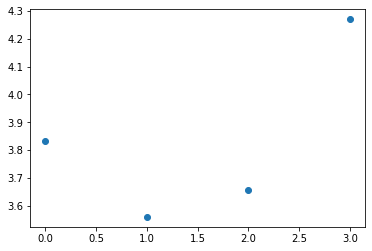

In [26]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

qual2016 = go.Scatter(x = [x for x in range(len(list(quality2016.values())))], y = list(quality2016.values()), mode = "markers", name = "Quality in 2016")
qual2017 = go.Scatter(x = [x for x in range(len(list(quality2017.values())))], y = list(quality2017.values()), mode = "markers", name = "Quality in 2017")
qual2018 = go.Scatter(x = [x for x in range(len(list(quality2018.values())))], y = list(quality2018.values()), mode = "markers", name = "Quality in 2018")
qual2019 = go.Scatter(x = [x for x in range(len(list(quality2019.values())))], y = list(quality2019.values()), mode = "markers", name = "Quality in 2019")

fig.add_trace(qual2016)
fig.add_trace(qual2017)
fig.add_trace(qual2018)
fig.add_trace(qual2019)

fig.update_layout(title = "Quality Index for Hospitals Over Time", yaxis1_title = "Quality Index", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)

fig.show()

x = [0,1,2,3]
y = [statistics.median(list(quality2019.values())), statistics.median(list(quality2018.values())), statistics.median(list(quality2017.values())), statistics.median(list(quality2016.values()))]
plt.scatter(x=x, y=y)
plt.show()

Regressing Finance With Quality

In [27]:
# Defining Datasets
qregressCommonHospitals = set(quality2018.keys()) & set(financeData2018["FAC_NO"])

qrfinanceData2018 = financeData2018.loc[financeData2018["FAC_NO"].isin(qregressCommonHospitals)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False)[["FAC_NO", "OCC_AVL", "TOT_ASST", "MED_STAFF", "VIS_TOT", "DIS_TOT"]]

In [28]:
future_quality = []
occupancy_avl = []
total_asst = []
med_staff = []
current_quality = []
patients = []

for hospital in qregressCommonHospitals:
    future_quality.append(quality2019[hospital])
    occupancy_avl.append(float(qrfinanceData2018.loc[qrfinanceData2018["FAC_NO"] == hospital]["OCC_AVL"]))
    total_asst.append(float(qrfinanceData2018.loc[qrfinanceData2018["FAC_NO"] == hospital]["TOT_ASST"]))
    med_staff.append(float(qrfinanceData2018.loc[qrfinanceData2018["FAC_NO"] == hospital]["MED_STAFF"]))
    patients.append(float(qrfinanceData2018.loc[qrfinanceData2018["FAC_NO"] == hospital]["DIS_TOT"]))
    current_quality.append(quality2018[hospital])
print(sum(patients)/len(patients))
future_std = np.std(np.array(future_quality))
remove = []
for val in range(len(future_quality)):
    if abs(future_quality[val] - sum(future_quality)/len(future_quality)) > 3 * future_std or future_quality[val] == 0:
        remove.append(val)
remove.reverse()
for val in remove:
    future_quality.pop(val)
    occupancy_avl.pop(val)
    total_asst.pop(val)
    med_staff.pop(val)
    current_quality.pop(val)

10047.932835820895


[0.6777024640536807]
1.8387721857099506
0.013851171434605111

[-0.23492733058530496]
8.722903880340212
0.009654109066952365

[-0.39959924408983705, 0.7426345683116546]
9.321261034910144
0.006099459897460385

[0.33289935333698434]
4.055630748697269
0.016813443461872055

[0.30778113026369863, 0.6732910358631002]
1.728584409250494
0.013708107522633416

[0.2438558051588575, -0.16659285121554582]
7.305360122796911
0.011082187988963927

[0.10898810546146945, -0.36755715591464655, 0.7358658243718538]
8.682254998184591
0.00642344241005581



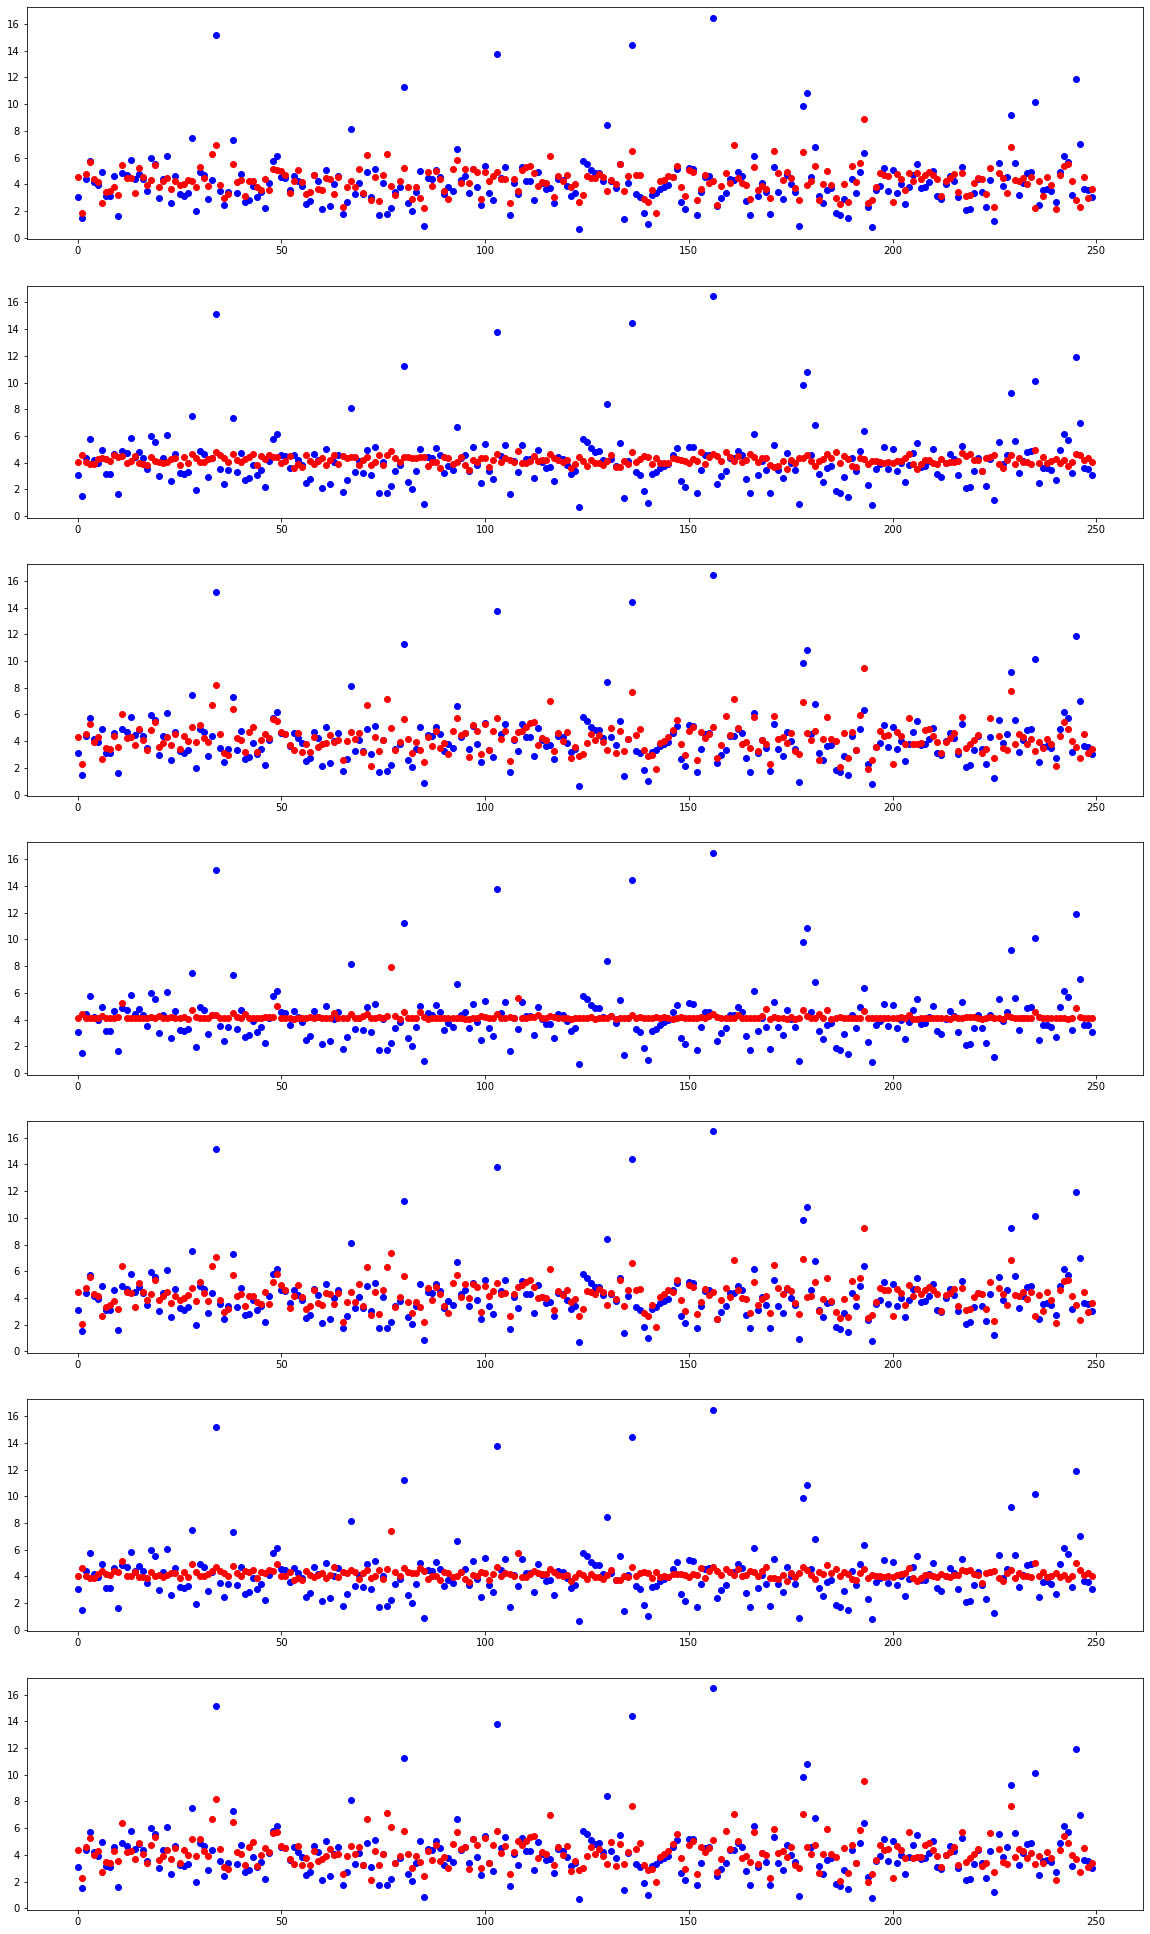

In [29]:
# Validation for checking variables, can kinda ignore
figure, axis = plt.subplots(7, 1, figsize=(20,35))
for val in range(1,8):
    
    current_factors = [[] for x in range(len(future_quality))]

    binequiv = str(bin(val))[2:]
    while len(binequiv) < 3:
        binequiv = "0" + binequiv
    
    if binequiv[0] == "1":
        for occ in range(len(occupancy_avl)):
            current_factors[occ].append(occupancy_avl[occ]/med_staff[occ])
    if binequiv[1] == "1":
        for asst in range(len(total_asst)):
            current_factors[asst].append(math.log(total_asst[asst]))
    if binequiv[2] == "1":
        for qual in range(len(current_quality)):
            current_factors[qual].append(current_quality[qual])
        
    clf = linear_model.LinearRegression()
    clf.fit(current_factors, future_quality)
    coefficients = list(clf.coef_)
    print(coefficients)
    
    pred_quality = []
    for factor in current_factors:
        qualitySum = 0
        
        for size in range(len(coefficients)):
            qualitySum += coefficients[size] * factor[size]
        pred_quality.append(qualitySum)
    
    diff = 0
    
    difference = statistics.mean(future_quality) - statistics.mean(pred_quality)
    for pred_qual in range(len(pred_quality)):
        pred_quality[pred_qual] = pred_quality[pred_qual] + difference
        diff += abs(future_quality[pred_qual] - pred_quality[pred_qual])**2 / (max(max(pred_quality), max(future_quality))-min(min(pred_quality), min(future_quality)))**2

    print(difference)    
    print(diff/len(pred_quality))
    print()
    
    axis[val-1].scatter(x = [x for x in range(len(future_quality))], y = future_quality, color = "blue")
    axis[val-1].scatter(x = [x for x in range(len(pred_quality))], y = pred_quality, color = "red")

plt.show()

Trying it with the last one

In [30]:
currentfactors = []
for index in range(len(occupancy_avl)):
    factors = []
    factors.append(occupancy_avl[index]/med_staff[index])
    factors.append(math.log(total_asst[index]))
    factors.append(current_quality[index])
    currentfactors.append(factors)

clf = linear_model.LinearRegression()
clf.fit(currentfactors, future_quality)
coefficients = list(clf.coef_)
print(coefficients)

pred_quality = []
for factor in currentfactors:
    qualitySum = 0
    for size in range(len(coefficients)):
        qualitySum += coefficients[size] * factor[size]
    pred_quality.append(qualitySum)

quality_diff = statistics.median(future_quality) - statistics.median(pred_quality)

for ind in range(len(pred_quality)):
    pred_quality[ind] += quality_diff

fig = make_subplots(specs=[[{"secondary_y": True}]])

realqual2019 = go.Scatter(x = [x for x in range(len(future_quality))], y = future_quality, mode = "markers", name = "Actual Quality")
predqual2019 = go.Scatter(x = [x for x in range(len(pred_quality))], y = pred_quality, mode = "markers", name = "Predicted Quality")

fig.add_trace(realqual2019)
fig.add_trace(predqual2019)

fig.update_layout(title = "Quality Index Prediction 2018-2019", yaxis1_title = "Quality Index", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(range = [0, 25])

fig.show()

print(quality_diff)

[0.10898810546146945, -0.36755715591464655, 0.7358658243718538]


8.462008924708064


In [31]:
summ = []
# what if we added a whole bunch of money
currentfactorsplus = []
for index in range(len(occupancy_avl)):
    factors = []
    factors.append(occupancy_avl[index]/med_staff[index])
    factors.append(math.log(total_asst[index] + patients[index] * 3286))
    summ.append(patients[index] * 3286)
    factors.append(current_quality[index])
    currentfactorsplus.append(factors)

print(summ)
print(sum(summ)/len(summ))

pred_qualityplus = []
for factor in currentfactorsplus:
    qualitySum = 0
    for size in range(len(coefficients)):
        qualitySum += coefficients[size] * factor[size]
    qualitySum += quality_diff
    pred_qualityplus.append(qualitySum)
    
fig = make_subplots(specs=[[{"secondary_y": True}]])

qual2019 = go.Scatter(x = [x for x in range(len(pred_quality))], y = pred_quality, mode = "markers", name = "Quality Before")
qualplus2019 = go.Scatter(x = [x for x in range(len(pred_qualityplus))], y = pred_qualityplus, mode = "markers", name = "Quality After")

fig.add_trace(qual2019)
fig.add_trace(qualplus2019)

fig.update_layout(title = "Quality Index After Bundled Payments", yaxis1_title = "Quality Index", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)

fig.show()

print((sum(pred_quality)-sum(pred_qualityplus))/len(pred_quality))
print(sum(pred_quality)/len(pred_quality))
print(((sum(pred_quality)-sum(pred_qualityplus))/len(pred_quality))/(sum(pred_quality)/len(pred_quality)))

[64934646.0, 6157964.0, 36934640.0, 50857422.0, 3105270.0, 28923372.0, 21602164.0, 7107618.0, 30635378.0, 35597238.0, 11418850.0, 12020188.0, 4054924.0, 43450778.0, 28897084.0, 17294218.0, 65223814.0, 62995906.0, 67632452.0, 25068894.0, 2168760.0, 62871038.0, 41988508.0, 61369336.0, 35150342.0, 42244816.0, 3069124.0, 35488800.0, 6039668.0, 94094610.0, 20521070.0, 47039090.0, 2405352.0, 23228734.0, 66120892.0, 21874902.0, 33303610.0, 3634316.0, 1738294.0, 9933578.0, 16150690.0, 21395146.0, 1320972.0, 11339986.0, 40795690.0, 43943678.0, 23028288.0, 8760476.0, 1705434.0, 50311946.0, 10180028.0, 21730318.0, 502758.0, 8155852.0, 27263942.0, 8182140.0, 59545606.0, 66341054.0, 10009156.0, 110057998.0, 54353726.0, 105138856.0, 6361696.0, 2799672.0, 20849670.0, 35902836.0, 13663188.0, 24336116.0, 92678344.0, 17573528.0, 7679382.0, 77359012.0, 14126514.0, 16702738.0, 4804132.0, 35156914.0, 79113736.0, 42133092.0, 5490906.0, 26380008.0, 39152690.0, 12115482.0, 92934652.0, 7275204.0, 1041662.0, 99

0.07098984102139275
3.9711287384730376
0.01787648945591461


Checking Different Years

In [32]:
# Defining Datasets
qregressCommonHospitals = set(quality2018.keys()) & set(financeData2017["FAC_NO"])

qrfinanceData2017 = financeData2017.loc[financeData2017["FAC_NO"].isin(qregressCommonHospitals)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False)[["FAC_NO", "OCC_AVL", "TOT_ASST", "MED_STAFF"]]

In [33]:
future_quality = []
occupancy_avl = []
total_asst = []
med_staff = []
current_quality = []

for hospital in qregressCommonHospitals:
    future_quality.append(quality2018[hospital])
    occupancy_avl.append(float(qrfinanceData2017.loc[qrfinanceData2017["FAC_NO"] == hospital]["OCC_AVL"]))
    total_asst.append(float(qrfinanceData2017.loc[qrfinanceData2017["FAC_NO"] == hospital]["TOT_ASST"]))
    med_staff.append(float(qrfinanceData2017.loc[qrfinanceData2017["FAC_NO"] == hospital]["MED_STAFF"]))
    current_quality.append(quality2017[hospital])

future_std = np.std(np.array(future_quality))
remove = []
for val in range(len(future_quality)):
    if abs(future_quality[val] - sum(future_quality)/len(future_quality)) > 3 * future_std or future_quality[val] == 0:
        remove.append(val)
remove.reverse()
for val in remove:
    future_quality.pop(val)
    occupancy_avl.pop(val)
    total_asst.pop(val)
    med_staff.pop(val)
    current_quality.pop(val)


In [34]:
currentfactors = []
for index in range(len(occupancy_avl)):
    factors = []
    factors.append(occupancy_avl[index]/med_staff[index])
    factors.append(math.log(total_asst[index]))
    factors.append(current_quality[index])
    currentfactors.append(factors)

pred_quality = []
for factor in currentfactors:
    qualitySum = 0
    for size in range(len(coefficients)):
        qualitySum += coefficients[size] * factor[size]
    qualitySum += quality_diff
    pred_quality.append(qualitySum)

fig = make_subplots(specs=[[{"secondary_y": True}]])

realqual2018 = go.Scatter(x = [x for x in range(len(future_quality))], y = future_quality, mode = "markers", name = "Actual Quality")
predqual2018 = go.Scatter(x = [x for x in range(len(pred_quality))], y = pred_quality, mode = "markers", name = "Predicted Quality")

fig.add_trace(realqual2018)
fig.add_trace(predqual2018)

fig.update_layout(title = "Quality Index Prediction 2017-2018", yaxis1_title = "Quality Index", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(range = [0, 25])

fig.show()


In [35]:
# Defining Datasets
qregressCommonHospitals = set(quality2017.keys()) & set(financeData2016["FAC_NO"])

qrfinanceData2016 = financeData2016.loc[financeData2016["FAC_NO"].isin(qregressCommonHospitals)].drop_duplicates(subset=["FAC_NO"], keep='first', inplace=False)[["FAC_NO", "OCC_AVL", "TOT_ASST", "MED_STAFF"]]

future_quality = []
occupancy_avl = []
total_asst = []
med_staff = []
current_quality = []

for hospital in qregressCommonHospitals:
    future_quality.append(quality2017[hospital])
    occupancy_avl.append(float(qrfinanceData2016.loc[qrfinanceData2016["FAC_NO"] == hospital]["OCC_AVL"]))
    total_asst.append(float(qrfinanceData2016.loc[qrfinanceData2016["FAC_NO"] == hospital]["TOT_ASST"]))
    med_staff.append(float(qrfinanceData2016.loc[qrfinanceData2016["FAC_NO"] == hospital]["MED_STAFF"]))
    current_quality.append(quality2016[hospital])

future_std = np.std(np.array(future_quality))
remove = []
for val in range(len(future_quality)):
    if abs(future_quality[val] - sum(future_quality)/len(future_quality)) > 3 * future_std or future_quality[val] == 0:
        remove.append(val)
remove.reverse()
for val in remove:
    future_quality.pop(val)
    occupancy_avl.pop(val)
    total_asst.pop(val)
    med_staff.pop(val)
    current_quality.pop(val)

currentfactors = []
for index in range(len(occupancy_avl)):
    factors = []
    factors.append(occupancy_avl[index]/med_staff[index])
    factors.append(math.log(total_asst[index]))
    factors.append(current_quality[index])
    currentfactors.append(factors)

pred_quality = []
for factor in currentfactors:
    qualitySum = 0
    for size in range(len(coefficients)):
        qualitySum += coefficients[size] * factor[size]
    qualitySum += quality_diff
    pred_quality.append(qualitySum)

fig = make_subplots(specs=[[{"secondary_y": True}]])

realqual2017 = go.Scatter(x = [x for x in range(len(future_quality))], y = future_quality, mode = "markers", name = "Actual Quality")
predqual2017 = go.Scatter(x = [x for x in range(len(pred_quality))], y = pred_quality, mode = "markers", name = "Predicted Quality")

fig.add_trace(realqual2017)
fig.add_trace(predqual2017)

fig.update_layout(title = "Quality Index Prediction 2016-2017", yaxis1_title = "Quality Index", xaxis1_title = "Hospitals")
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(range = [0, 25])

fig.show()